In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [6]:
X = data.drop(['sex'], axis=1)
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [7]:
y = data['sex']

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [9]:
ft = ohe.fit_transform(data[['nationality', 'sport']])

In [10]:
ohe.transform(data[['nationality', 'sport']])

<10858x227 sparse matrix of type '<class 'numpy.float64'>'
	with 21716 stored elements in Compressed Sparse Row format>

In [11]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [12]:
le.fit( data['sex'] )

LabelEncoder()

In [13]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [14]:
model = LogisticRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=800)
X_train.head(5)

,height,weight,gold,silver,bronze
3128,1.63,52.0,0,0,0
2611,1.90,87.0,0,0,0
148,1.62,65.0,0,0,0
27,1.85,75.0,0,0,0
8908,1.75,65.0,0,0,0


In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import roc_curve

In [18]:
predictions = model.predict_proba(X_test)[:, 1]
predictions

array([0.1848139 , 0.0810495 , 0.74539919, ..., 0.88242643, 0.92848334,
       0.2335515 ])

In [19]:
np.where(predictions >= 1, 1, 0)
fpr, tpr, thres = roc_curve( y_test, predictions)

In [45]:
tpr

array([0.        , 0.79010239, 1.        ])

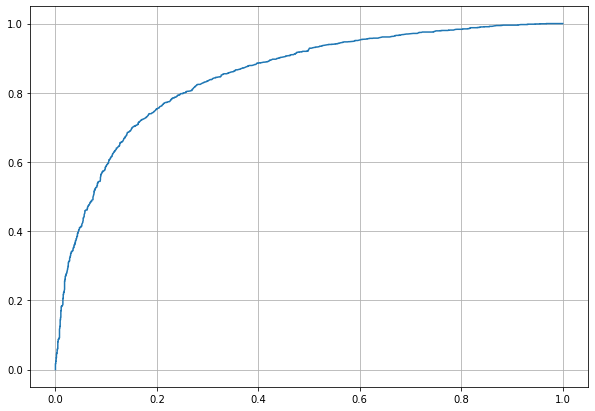

In [20]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]
plt.plot( fpr, tpr )
plt.grid()
plt.show()

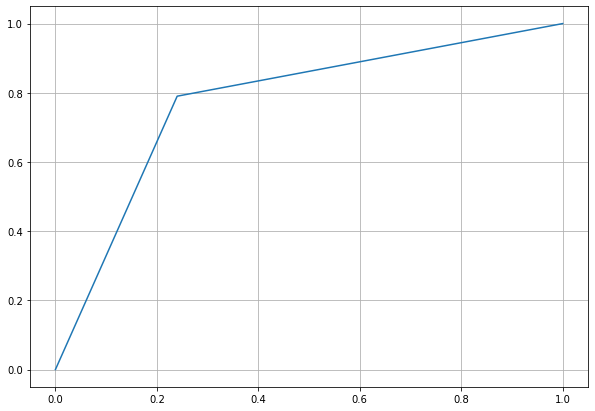

In [21]:
fpr, tpr, thres = roc_curve( y_test, model.predict(X_test))
plt.plot(fpr, tpr)
plt.grid()
plt.show()

### Домашнее задание

Рассчитаем парметрами FPR и TPR вручную  

FPR - вероятность отклонения изначально верной гипотезы  
TPR - вероятность принятия изначально верной гипотезы  
FPR = FP/(FP + TN)  
TPR = TP/(TP + FN)  
где:
    FP - факт подтверждения изначально неверной гипотезы  
    TN - факт отклонения изначально верной гипотезы  
    TP - факт подтверждения изначально верной гипотезы  
    FN - факт откллонения изначально неверной гипотезы

Нулевая гипотеза - предсказываемый класс - есть 0 

In [26]:
predictions = np.where(predictions >= 0.5, 1, 0)
len(predictions)

3258

In [28]:
len(y_test)

3258

In [67]:
FP = 0
TN = 0
TP = 0
FN = 0
for _ in range(len(predictions)):
    if predictions[_] == y_test.values[_] == 0:
        TP += 1
    elif predictions[_] == 1 and y_test.values[_] == 1:
        TN += 1
    elif predictions[_] == 1 and y_test.values[_] == 0:
        FN += 1
    elif predictions[_] == 0 and y_test.values[_] == 1:
        FP += 1


In [68]:
print('FP', FP)
print('TN', TN)
print('TP', TP)
print('FN', FN)

FP 369
TN 1389
TP 1140
FN 360


In [69]:
FPR = FP/(FP + TN)
FPR

0.2098976109215017

In [70]:
TPR = TP/(TP + FN)
TPR

0.76

In [74]:
acc = (TP + TN) / (TP + FP + FN + TN)

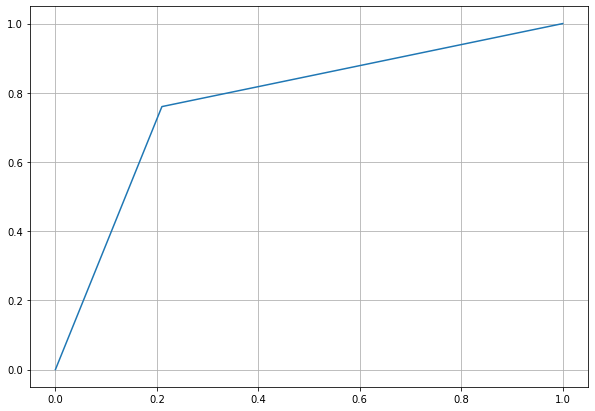

In [72]:
plt.plot([0, FPR, 1], [0, TPR, 1])
plt.grid()
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)
acc_alg = roc_auc_score(y_test, model.predict(X_test))

In [80]:
print('Точность ручным подсчетом: %s, точность подсчета алгоритмом %s' % (round(acc, 2), round(acc_alg, 2)))

Точность ручным подсчетом: 0.78, точность подсчета алгоритмом 0.78
